In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data, iris.target
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, y)
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
# from sklearn.datasets import load_wine
# wine = load_wine()
# X, y = wine.data, wine.target
# wine.keys()

In [3]:
X.shape, y.shape

((150, 4), (150,))

In [4]:
import numpy as np
from collections import Counter
import random

In [5]:
# def calculate_gini_impurity(y):
#     gini = 0
#     total = len(y)

#     n_classes = len(set(y))
#     counts = Counter(y)
    
#     for k,v in counts.items():
#         gini += (v/total)**2
#     gini_impurity = 1 - gini
    
#     return gini_impurity


# def calculate_entropy(y):
#     entropy = 0
#     total = len(y)

#     n_classes = len(set(y))
#     counts = Counter(y)
    
#     for k,v in counts.items():
#         p_class = v/total
#         # print(p_class)
#         entropy += -(p_class) * np.log(p_class) / np.log(2)
    
#     return entropy


# def feature_split_interval(X_feature, interval_granularity=0.2, default_max_len_intervals=5):
#     """
#     Get the intervals for a particular feature to find the gini impurity values for the split.
#     """
#     X_feature = X_feature.reshape(-1,)

#     feature_max, feature_min = max(X_feature), min(X_feature)

#     max_len_intervals = max(default_max_len_intervals, int(interval_granularity * X_feature.shape[0]))
#     # print(max_len_intervals)

#     X_feature_sorted = np.sort(X_feature)

#     unique_values = np.unique(X_feature)

#     if unique_values.shape[0] == 1:
#         # print(np.array([unique_values[0]]))
#         return np.array([unique_values[0]])
#     elif unique_values.shape[0] == 2:
#         # print(np.array([unique_values.mean()]))
#         return np.array([unique_values.mean()])

#     # return X_feature_sorted

#     cum_diff = np.roll(X_feature_sorted, -1) - X_feature_sorted
#     cum_diff = cum_diff[:-1]
#     max_diff, min_diff = max(cum_diff), min(cum_diff)
#     median_diff = np.median(cum_diff)
#     median_nonzero_diff = np.median(cum_diff[cum_diff!=0])
#     min_nonzero_diff = np.min(cum_diff[cum_diff!=0])

#     start = feature_min + min_nonzero_diff/2
#     end = feature_max - min_nonzero_diff/2
#     min_nonzero_diff_interval = np.arange(start, end, min_nonzero_diff)

#     # print(start, end, min_nonzero_diff_interval)

#     if min_nonzero_diff_interval.shape[0] > max_len_intervals:
#         return np.linspace(start, end, max_len_intervals)

#     return min_nonzero_diff_interval


# def optimal_feature_split(X_feature, y, criterion='gini'):
#     split_intervals = feature_split_interval(X_feature)

#     if criterion == 'gini':
#         parent_node_criterion_value = calculate_gini_impurity(y)
#     else:
#         parent_node_criterion_value = calculate_entropy(y)

#     min_weighted_criterion_value = 1

#     # print(split_intervals, X_feature)
#     optimal_split_values = [split_intervals[0]]

#     for split_value in split_intervals:
#         # print(split_value)
#         ge_split = y[X_feature >= split_value]
#         lt_split = y[X_feature < split_value]

#         if criterion == 'gini':
#             weighted_criterion_value = (calculate_gini_impurity(lt_split) * len(lt_split) \
#                 + calculate_gini_impurity(ge_split) * len(ge_split))/ len(y)
#         else:
#             weighted_criterion_value = (calculate_entropy(lt_split) * len(lt_split) \
#                 + calculate_entropy(ge_split) * len(ge_split))/ len(y)
        
#         if weighted_criterion_value <= min_weighted_criterion_value:
#             if weighted_criterion_value == min_weighted_criterion_value:
#                 optimal_split_values.append(split_value)
#             else:
#                 optimal_split_values = [split_value]
#                 min_weighted_criterion_value = weighted_criterion_value
    
#     return np.mean(optimal_split_values), min_weighted_criterion_value

In [6]:
# class Node:
#     """
#     A class to represent a node(leaf) of a decision tree.
#     """

#     def __init__(self, X, y, height, max_tree_height, criterion):
#         self.X = X
#         self.y = y
#         self.height = height
#         self.max_tree_height = max_tree_height
#         self.criterion = criterion
#         if criterion == 'gini':
#             self.criterion_value = calculate_gini_impurity(y)
#         else: 
#             self.criterion_value = calculate_entropy(y)
        
#         self.num_samples, self.num_features = X.shape
#         self.final_class = Counter(y).most_common()[0][0]
#         self.left_child = None
#         self.right_child = None

#         # print(self.gini_impurity)

#         if self.criterion_value == 0 or self.height >= max_tree_height:
#             self.is_terminal = True
#             # print(self.gini_impurity, self.height, self.max_tree_height)
#         else:
#             self.is_terminal = False
#             self.feature_split = random.choice([*range(self.num_features)])
#             # print(X[:,self.feature_split])
#             split_intervals = feature_split_interval(X[:,self.feature_split])
#             # print(split_intervals)
#             self.split_value = np.random.choice(split_intervals)
        
#         # print(X.shape, y.shape, self.criterion_value, self.is_terminal)


#     def fit(self):
#         # print(self.X.shape)
#         min_criterion_value = 1
#         for i in range(self.num_features):
#             split_value, split_criterion_value = optimal_feature_split(self.X[:,i], self.y, criterion=self.criterion)
#             if split_criterion_value < min_criterion_value:
#                 min_criterion_value = split_criterion_value
#                 best_feature = i
#                 best_feature_split_value = split_value
        
#         X_feature = self.X[:, best_feature]
        
#         X_lt = self.X[X_feature < best_feature_split_value, :]
#         X_ge = self.X[X_feature >= best_feature_split_value, :]

#         y_lt = self.y[X_feature < best_feature_split_value]
#         y_ge = self.y[X_feature >= best_feature_split_value]

#         self.feature_split = best_feature
#         self.split_value = best_feature_split_value
#         self.split_criterion_value = min_criterion_value

#         # print(best_feature, best_feature_split_value, min_gini_impurity, self.height)

#         if self.criterion_value <= min_criterion_value:
#             # This means the split did not improve the criteron - gini impurity, we need to stop
#             return self

#         self.left_child = Node(X_lt, y_lt, self.height+1, self.max_tree_height, self.criterion)
#         self.right_child = Node(X_ge, y_ge, self.height+1, self.max_tree_height, self.criterion)

#         if not self.left_child.is_terminal:
#             self.left_child.fit()

#         if not self.right_child.is_terminal:
#             self.right_child.fit()

#         return self


#     def predict_sample(self, X_sample):
#         if self.is_terminal:
#             return self.final_class
#         if X_sample[self.feature_split] >= self.split_value:
#             # Pass on to the right child
#             if self.right_child is not None:
#                 return self.right_child.predict_sample(X_sample)
#             else:
#                 return self.final_class
#         else:
#             if self.left_child is not None:
#                 return self.left_child.predict_sample(X_sample)
#             else:
#                 return self.final_class

In [7]:
# class DecisionTreeClassifier:
#     """
#     A Decision Tree Classifier Machine Learning algorithm.

#     Parameters:
#         max_depth (int): The maximum depth of the decision tree
#         criterion (str): The criterion for splitting - 'gini' or 'information gain'
#     """

#     def __init__(self, max_depth: int=20, criterion: str='gini'):
#         self.max_depth = max_depth
#         self.criterion = criterion


#     def fit(self, X: np.array, y: np.array):
#         n_samples, n_features = X.shape
#         assert n_samples == y.shape[0]
#         assert len(y.shape) == 1 or y.shape[1] == 1

#         self.root_node = Node(X, y, 1, self.max_depth, self.criterion)
#         self.root_node.fit()

#         return self

    
#     def predict(self, X):
#         y_pred = np.array([self.root_node.predict_sample(X_sample) for X_sample in X])
#         return y_pred

In [8]:
from tree.decision_tree import DecisionTreeClassifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [10]:
clf = DecisionTreeClassifier(max_depth=5, criterion='information_gain')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.9732142857142857, 0.9473684210526315)

In [11]:
clf = DecisionTreeClassifier(max_depth=5, criterion='gini')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.9821428571428571, 0.9210526315789473)

In [12]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(1.0, 0.9736842105263158)

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(1.0, 0.9736842105263158)

1.0 0.9736842105263158


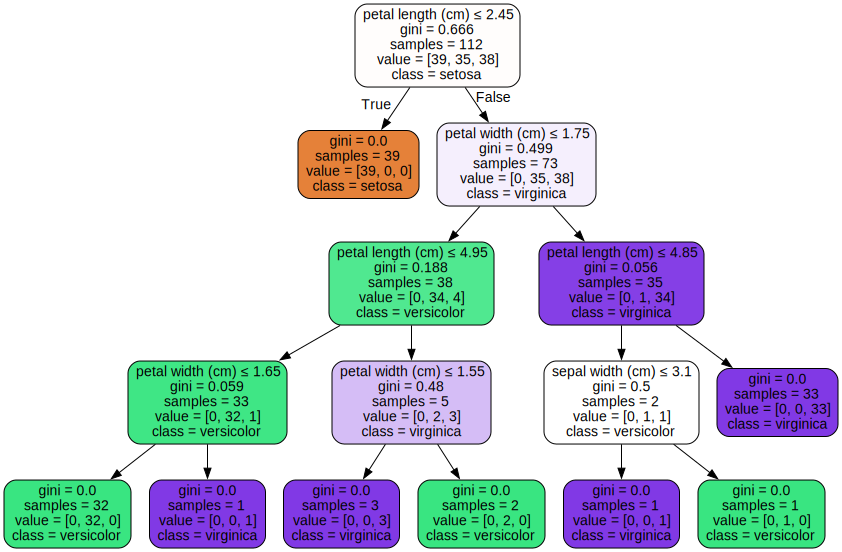

In [14]:
import graphviz

clf = tree.DecisionTreeClassifier(max_depth=5, criterion='gini')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph 

In [15]:
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<petal length (cm) &le; 2.45<br/>gini = 0.666<br/>samples = 112<br/>value = [39, 35, 38]<br/>class = setosa>, fillcolor="#fffdfc"] ;
1 [label=<gini = 0.0<br/>samples = 39<br/>value = [39, 0, 0]<br/>class = setosa>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<petal width (cm) &le; 1.75<br/>gini = 0.499<br/>samples = 73<br/>value = [0, 35, 38]<br/>class = virginica>, fillcolor="#f5effd"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<petal length (cm) &le; 4.95<br/>gini = 0.188<br/>samples = 38<br/>value = [0, 34, 4]<br/>class = versicolor>, fillcolor="#50e890"] ;
2 -> 3 ;
4 [label=<petal width (cm) &le; 1.65<br/>gini = 0.059<br/>samples = 33<br/>value = [0, 32, 1]<br/>class = versicolor>, fillcolor="#3fe685"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 32<br/>value = [0, 32

In [16]:
clf = DecisionTreeClassifier(max_depth=5, criterion='gini')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.9821428571428571, 0.9210526315789473)

In [17]:
dot_data = clf.export_graphviz(feature_names=iris.feature_names, class_names=iris.target_names,)

{'e58139': 0.3482142857142857, '39e581': 0.3125, '8139e5': 0.3392857142857143}
{'e58139': 1.0, '39e581': 0.0, '8139e5': 0.0}
{'e58139': 0.0, '39e581': 0.4794520547945205, '8139e5': 0.5205479452054794}
{'e58139': 0.0, '39e581': 0.9166666666666666, '8139e5': 0.08333333333333333}
{'e58139': 0.0, '39e581': 1.0, '8139e5': 0.0}
{'e58139': 0.0, '39e581': 0.4, '8139e5': 0.6}
{'e58139': 0.0, '39e581': 0.0, '8139e5': 1.0}
{'e58139': 0.0, '39e581': 0.6666666666666666, '8139e5': 0.3333333333333333}
{'e58139': 0.0, '39e581': 0.05405405405405406, '8139e5': 0.9459459459459459}
{'e58139': 0.0, '39e581': 0.5, '8139e5': 0.5}
{'e58139': 0.0, '39e581': 0.0, '8139e5': 1.0}
{'e58139': 0.0, '39e581': 1.0, '8139e5': 0.0}
{'e58139': 0.0, '39e581': 0.02857142857142857, '8139e5': 0.9714285714285714}
{'e58139': 0.0, '39e581': 0.5, '8139e5': 0.5}
{'e58139': 0.0, '39e581': 0.0, '8139e5': 1.0}


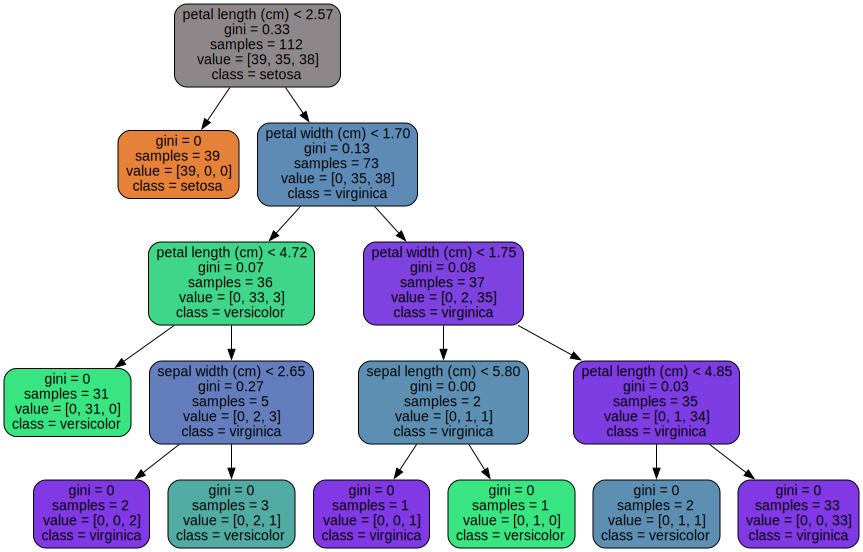

In [18]:
graph = graphviz.Source(dot_data)
graph 

In [19]:
value = [0,1,38]
class_colors = ["3dcc63", "7c34cf", "db4618"]
# class_colors = ["ffffff", "0000ff", "000000"]


calculate_node_fillcolor(value, class_colors)


NameError: name 'calculate_node_fillcolor' is not defined

In [ ]:
combine_hex_values({"ffffff": 1.0, "0000ff": 0.5, "000000": 0.05})

'a4a4f6'